In [37]:
# connect to the database
import datajoint as dj
dj.config.load('/Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json')
dj.conn()
direction_dict = {'LR':'Left - Right',
                  'RL':'Right - Left',
                  'AP':'Anterior - Posterior',
                  'PA':'Posterior - Anterior'}


[2026-01-08 12:58:48,667][INFO]: DataJoint is configured from /Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json


In [10]:
#%% import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from ndnf_pipeline import lab, experiment
import numpy as np
#

[2026-01-07 21:39:40,307][WARNING]: Reconnecting to MySQL server.


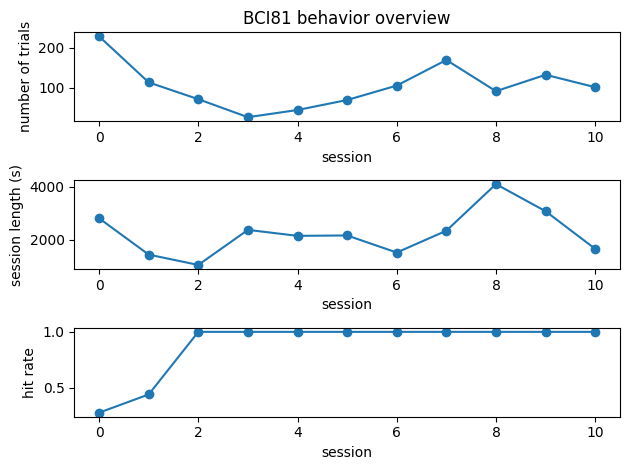

In [11]:

subject_id = 'BCI81'
available_sessions = (experiment.Session()&{'subject_id':subject_id}).fetch('session')
trial_nums = []
hit_rates = []
session_lengths = []
for session in available_sessions:
    trials = (experiment.SessionTrial()&{'subject_id':subject_id,'session':session}).fetch('trial')
    trial_nums.append(len(trials))
    hits = len(experiment.BehaviorTrial()&{'subject_id':subject_id,'session':session,'outcome':'hit'})
    hit_rate = hits/len(trials) if len(trials)>0 else np.nan
    hit_rates.append(hit_rate)
    session_length = (experiment.SessionTrial()&{'subject_id':subject_id,'session':session,'trial':np.max(trials)}).fetch1('trial_end_time')
    session_lengths.append(session_length)
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax1.plot(available_sessions,trial_nums,'o-')
ax1.set_xlabel('session')
ax1.set_ylabel('number of trials')
plt.title(f'{subject_id} behavior overview')
ax2 = fig.add_subplot(3,1,2)
ax2.plot(available_sessions,session_lengths,'o-')
ax2.set_xlabel('session')
ax2.set_ylabel('session length (s)')
ax3 = fig.add_subplot(3,1,3)
ax3.plot(available_sessions,hit_rates,'o-')
ax3.set_xlabel('session')
ax3.set_ylabel('hit rate')
plt.tight_layout()
plt.show()

array([-4.94952172e+00, -4.94001264e+00, -4.93050356e+00, -4.92099448e+00,
       -4.91148539e+00, -4.90197631e+00, -4.89246723e+00, -4.88295815e+00,
       -4.87344906e+00, -4.86393998e+00, -4.85443090e+00, -4.84492182e+00,
       -4.83541274e+00, -4.82590365e+00, -4.81639457e+00, -4.80688549e+00,
       -4.79737641e+00, -4.78786732e+00, -4.77835824e+00, -4.76884916e+00,
       -4.75934008e+00, -4.74983099e+00, -4.74032191e+00, -4.73081283e+00,
       -4.72130375e+00, -4.71179466e+00, -4.70228558e+00, -4.69277650e+00,
       -4.68326742e+00, -4.67375833e+00, -4.66424925e+00, -4.65474017e+00,
       -4.64523109e+00, -4.63572200e+00, -4.62621292e+00, -4.61670384e+00,
       -4.60719476e+00, -4.59768567e+00, -4.58817659e+00, -4.57866751e+00,
       -4.56915843e+00, -4.55964935e+00, -4.55014026e+00, -4.54063118e+00,
       -4.53112210e+00, -4.52161302e+00, -4.51210393e+00, -4.50259485e+00,
       -4.49308577e+00, -4.48357669e+00, -4.47406760e+00, -4.46455852e+00,
       -4.45504944e+00, -

/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_38383/4049609196.py:46: RuntimeWarning: divide by zero encountered in log
  forcehist = np.log(forcehist/sum(forcehist.flatten()))
/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_38383/4049609196.py:46: RuntimeWarning: divide by zero encountered in log
  forcehist = np.log(forcehist/sum(forcehist.flatten()))
/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_38383/4049609196.py:46: RuntimeWarning: divide by zero encountered in log
  forcehist = np.log(forcehist/sum(forcehist.flatten()))
/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_38383/4049609196.py:46: RuntimeWarning: divide by zero encountered in log
  forcehist = np.log(forcehist/sum(forcehist.flatten()))
/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_38383/4049609196.py:46: RuntimeWarning: divide by zero encountered in log
  forcehist = np.log(forcehist/sum(forcehist.flatten()))
/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/i

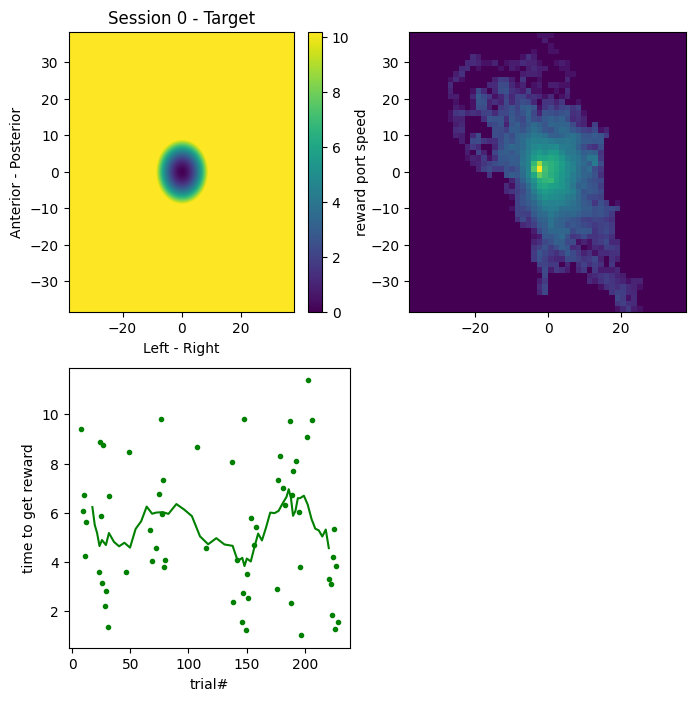

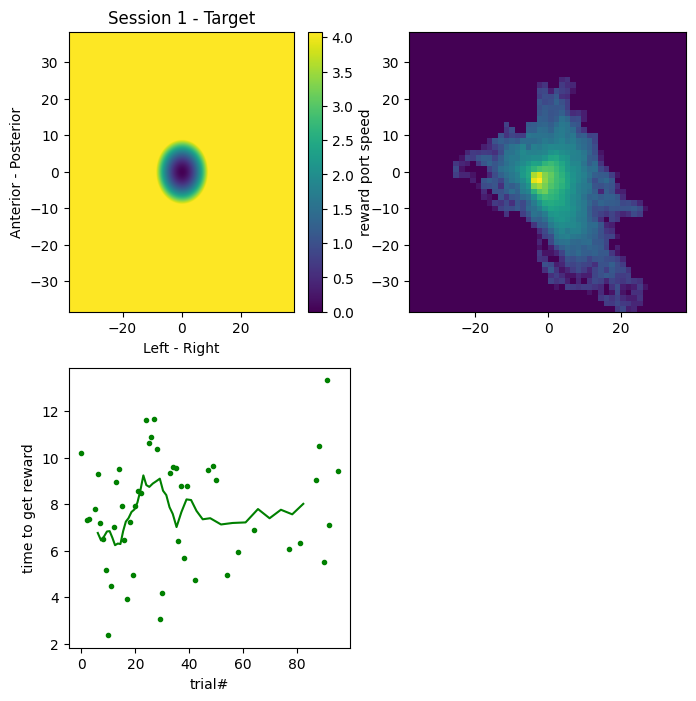

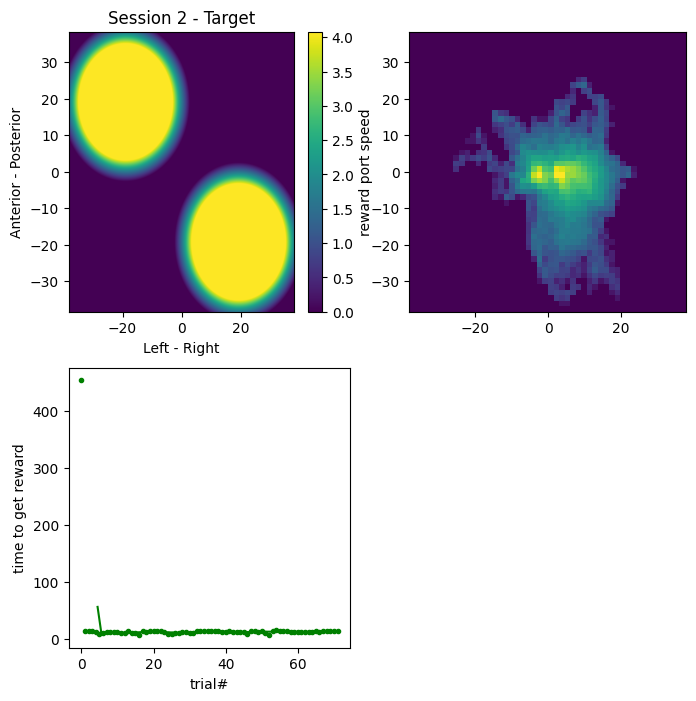

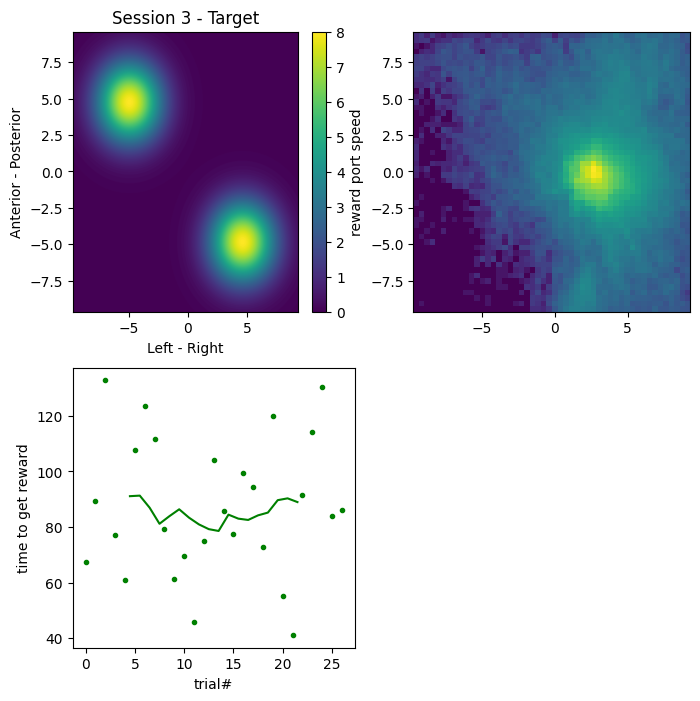

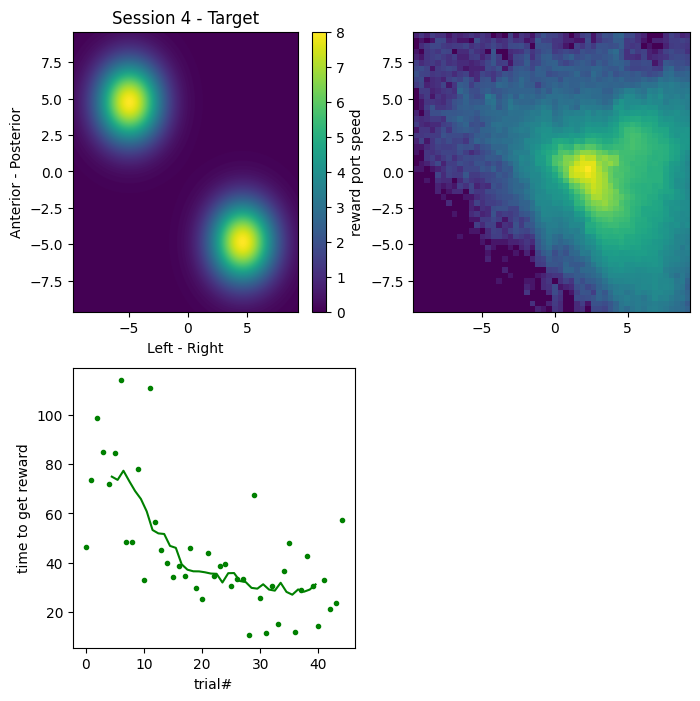

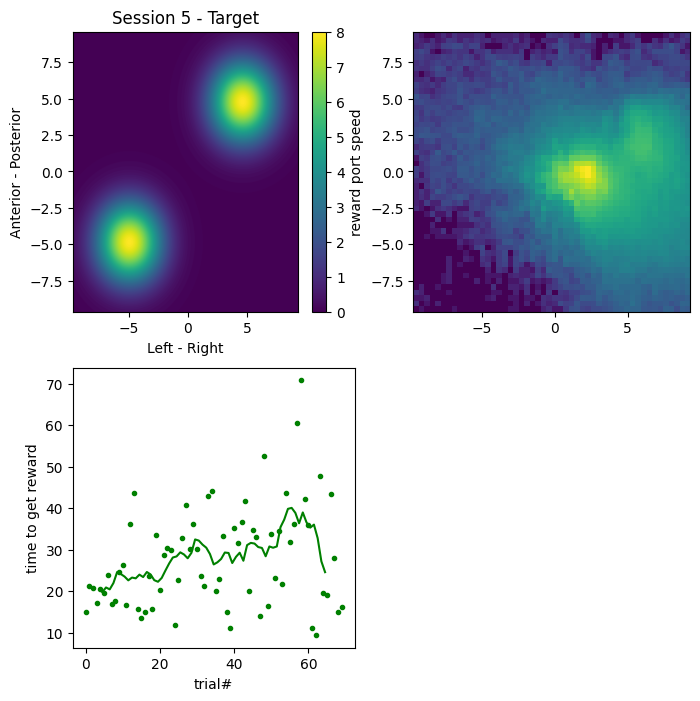

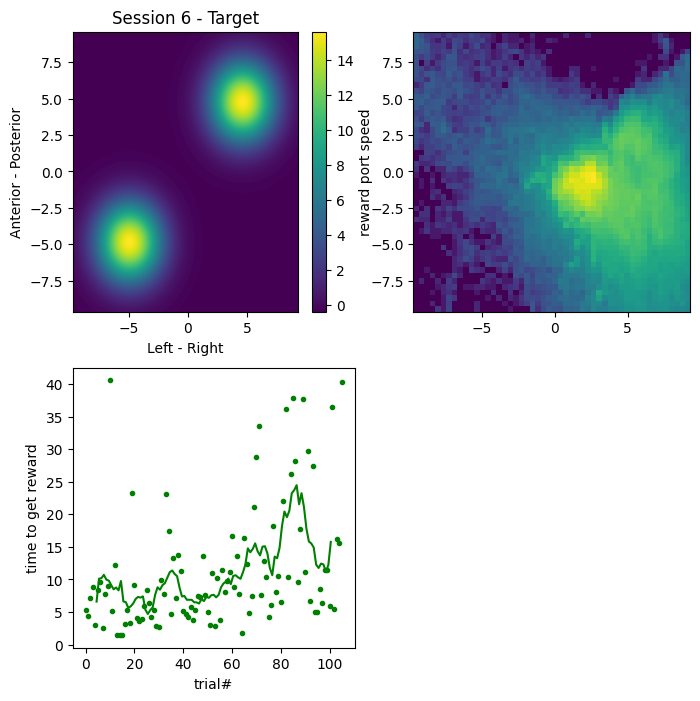

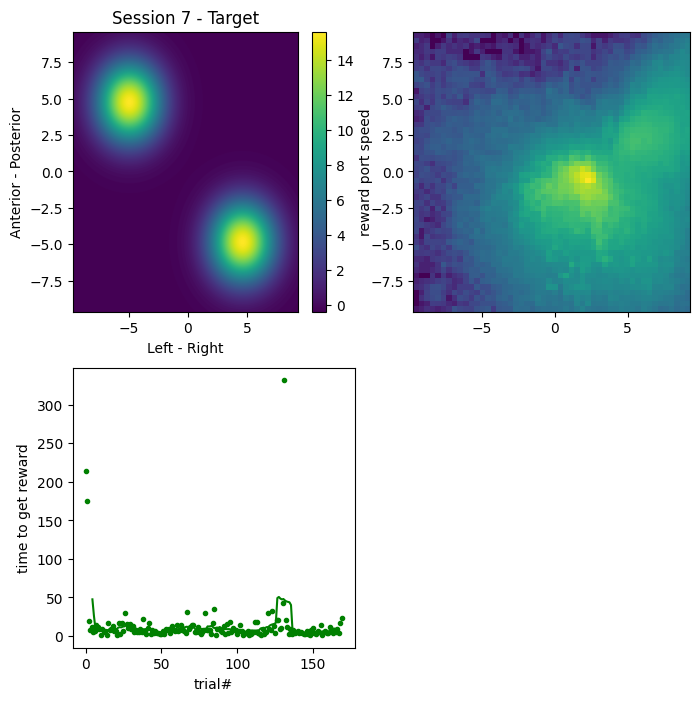

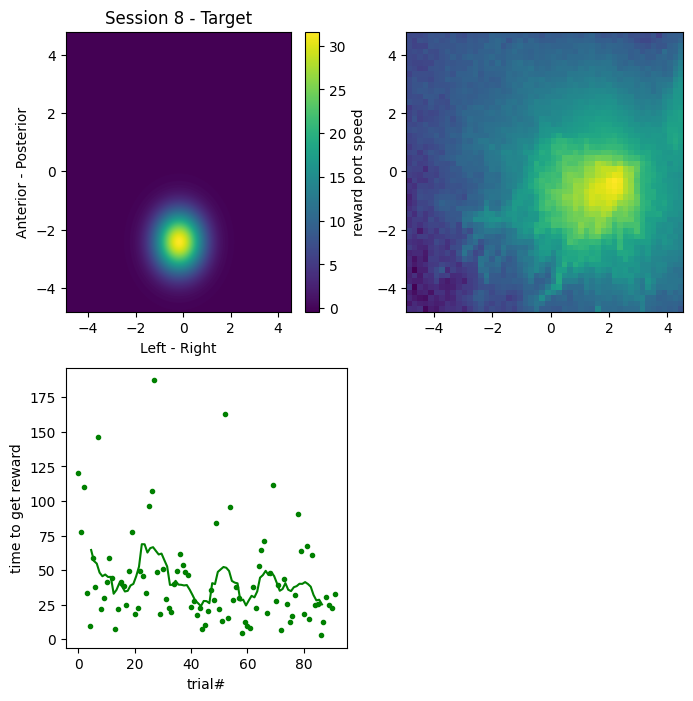

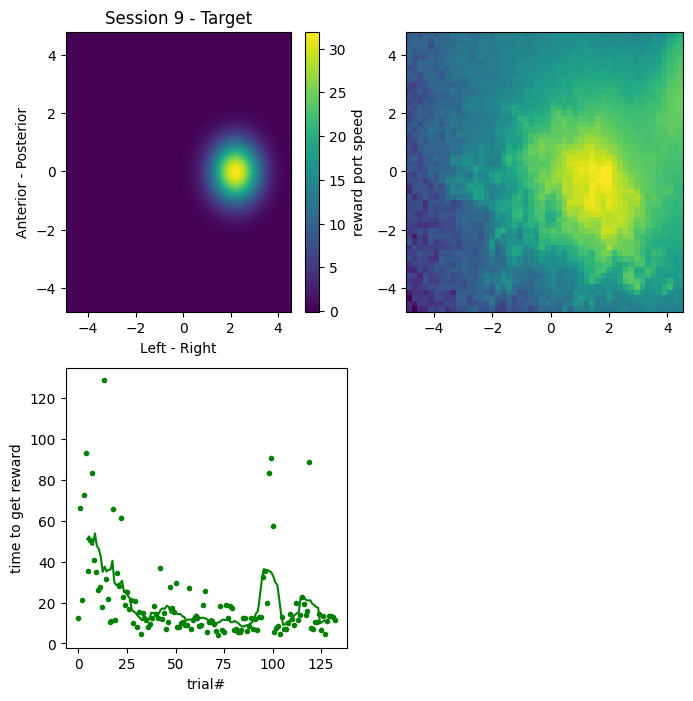

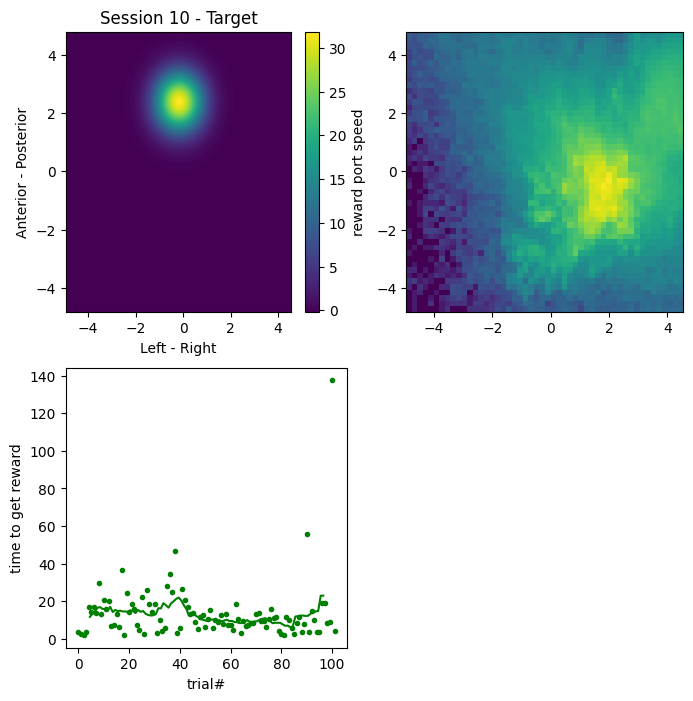

In [ ]:
# visualize targets, and how forces change over sessions and trials
import matplotlib.pyplot as plt


for session_i, session in enumerate(available_sessions):
    fig = plt.figure(figsize=(8,8))

    ax_target_LUT = fig.add_subplot(2,2,1)
    target_force_lut = (experiment.TaskSettings()&{'subject_id':subject_id,'session':session}).fetch1('target_force_lut')
    force_axes = (experiment.TaskSettings.ForceAxis()&{'subject_id':subject_id,'session':session}).fetch(as_dict=True)
    force_axes_dict = {}
    for fa in force_axes:
        force_axes_dict[fa['force_axis_idx']] = {'force_direction':fa['force_direction'],
                                                'target_force_axes':fa['target_force_axes']}
    im_lut = plt.imshow(target_force_lut,extent = [force_axes_dict[0]['target_force_axes'][0],force_axes_dict[0]['target_force_axes'][-1],
                                                  force_axes_dict[1]['target_force_axes'][0],force_axes_dict[1]['target_force_axes'][-1]],
                                                  origin='lower',
                                                  cmap='viridis',
                                                  aspect='auto')
    plt.xlabel(direction_dict[force_axes_dict[0]['force_direction']])
    plt.ylabel(direction_dict[force_axes_dict[1]['force_direction']])
    plt.colorbar(im_lut,label='reward port speed')
    plt.title(f'Session {session} - Target')


    ax_performance = fig.add_subplot(2,2,3)
    rewarded_trial, time_to_reward = (experiment.TrialEvent()&{'subject_id':subject_id,'session':session,'trial_event_type':'reward'}).fetch('trial','trial_event_time')    #break
    ax_performance.set_xlabel('trial#')
    ax_performance.plot(rewarded_trial,time_to_reward,'g.')
    ax_performance.plot(np.convolve(rewarded_trial,np.ones(10)/10,mode='valid'),
                        np.convolve(np.asarray(time_to_reward,float),np.ones(10)/10,mode='valid'),'g-')
    
    ax_performance.set_ylabel('time to get reward')
    
    ax_force_hist = fig.add_subplot(2,2,2)
    force_traces_0 = (experiment.TrialForceTrace.TrialForceAxis() &{'subject_id':subject_id,'session':session,'force_axis_idx':0}).fetch('force_trace_value')
    force_traces_1 = (experiment.TrialForceTrace.TrialForceAxis() &{'subject_id':subject_id,'session':session,'force_axis_idx':1}).fetch('force_trace_value')
    forcehist,binx,biny = np.histogram2d(np.concatenate(force_traces_0),
                                         np.concatenate(force_traces_1),
                                         range=[[force_axes_dict[0]['target_force_axes'][0],
                                                force_axes_dict[0]['target_force_axes'][-1]],
                                                [force_axes_dict[1]['target_force_axes'][0],
                                                force_axes_dict[1]['target_force_axes'][-1]]],
                                                bins=50)
    forcehist_all = forcehist.copy()
    forcehist = np.log(forcehist/sum(forcehist.flatten()))
    forcehist_ = forcehist.copy()
    forcehist_ [np.isinf(forcehist )] = 0
    forcehist[np.isinf(forcehist)] = np.nanmin(forcehist_.flatten())
    im_hist = ax_force_hist.imshow(forcehist,
                                   extent = [binx[0],binx[-1],biny[0],biny[-1]],
                                    alpha = 1)
    plt.title('Force distribution')
    #ax_performance.set_yscale('log')
    

In [72]:
binx

array([-38.19802839, -36.67809666, -35.15816492, -33.63823319,
       -32.11830146, -30.59836972, -29.07843799, -27.55850626,
       -26.03857452, -24.51864279, -22.99871106, -21.47877932,
       -19.95884759, -18.43891586, -16.91898412, -15.39905239,
       -13.87912066, -12.35918892, -10.83925719,  -9.31932546,
        -7.79939372,  -6.27946199,  -4.75953026,  -3.23959852,
        -1.71966679,  -0.19973506,   1.32019668,   2.84012841,
         4.36006014,   5.87999188,   7.39992361,   8.91985534,
        10.43978708,  11.95971881,  13.47965054,  14.99958228,
        16.51951401,  18.03944574,  19.55937747,  21.07930921,
        22.59924094,  24.11917267,  25.63910441,  27.15903614,
        28.67896787,  30.19889961,  31.71883134,  33.23876307,
        34.75869481,  36.27862654,  37.79855827])

In [70]:
force_axes_dict[0]['target_force_axes'][0]

np.float64(-38.19802838970582)